#  COVID-19 PANDEMIC DATA ANALYSIS

A lot of people around the world are getting affected by the novel coronavirus, Subsequently data is being generated daily by every country pertaining to this. I have considered two datasets for this project, the datasets consists of COVID-19 data across the world and India. This project performs an exploratory analysis on the COVID-19 pandemic data and tries to draw meaningful insights through various metrics. I have used Numpy, Pandas, Matplotlib and Seaborn libraries of python for the project.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Python Pandas particularly deals well with CSV files. For the same dataset for World Data is downloaded from kaggle and india's dataset is downloaded manually.

The links for the datasets are given below:

World dataset: https://www.kaggle.com/imdevskp/corona-virus-report

India dataset: https://prsindia.org/covid-19/cases

In [283]:
!pip install jovian opendatasets --upgrade --quiet

In [284]:
!pip install pandas

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
!pip install seaborn

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/imdevskp/corona-virus-report' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saik65489
Your Kaggle Key: ········


100%|██████████| 19.0M/19.0M [00:00<00:00, 349MB/s]

The dataset has been downloaded and extracted.

In [296]:
data_dir = './corona-virus-report'

In [7]:
import os
os.listdir(data_dir)

['country_wise_latest.csv',
 'worldometer_data.csv',
 'full_grouped.csv',
 'usa_county_wise.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv']

Let us save and upload our work to Jovian before continuing.

In [10]:
project_name = "zerotopandas-course-project-covid-19-world_wise" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

For any dataset involving large number of rows and columns, data preparation and cleaning is very important.This includes changing the date-time format(If any), imputing or deleting missing and incorrect values.

For this dataset, I had to change the Date-time format to pandas date-time format.

Deleted some columns which are not used in the analysis.

Created new DataFrames from the existing ones for a clear analysis.



In [12]:
import pandas as pd

In [13]:
covid_data_df = pd.read_csv('corona-virus-report/day_wise.csv')

In [117]:
covid_india_df = pd.read_csv('covid_india.csv')

In [300]:
#filtering_Data
india_df = covid_india_df[covid_india_df.Region == 'India']

In [201]:
india_df

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered
0,1,3/12/2020,India,74,71,3.0,0.0,74,0,3
1,2,3/13/2020,India,75,71,3.0,1.0,1,1,0
2,3,3/14/2020,India,84,72,10.0,2.0,9,1,7
3,4,3/15/2020,India,107,95,10.0,2.0,23,0,0
4,5,3/16/2020,India,114,99,13.0,2.0,7,0,3
...,...,...,...,...,...,...,...,...,...,...
202,203,9/30/2020,India,6225763,940441,5187825.0,97497.0,80472,1179,86428
203,204,10/1/2020,India,6312584,940705,5273201.0,98678.0,86821,1181,85376
204,205,10/2/2020,India,6394068,942217,5352078.0,99773.0,81484,1095,78877
205,206,10/3/2020,India,6473544,944996,5427706.0,100842.0,79476,1069,75628


India dataframe contains 207 rows and 10 columns.

Let's view the list of columns in the data frame.

In [202]:
india_df.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death', 'New Cases', 'New Deaths',
       'New Recovered'],
      dtype='object')

In [301]:
#deleting useless columns
india_df = india_df.drop(columns= ['S. No.','Region'])

In [204]:
india_df

,Date,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered
0,3/12/2020,74,71,3.0,0.0,74,0,3
1,3/13/2020,75,71,3.0,1.0,1,1,0
2,3/14/2020,84,72,10.0,2.0,9,1,7
3,3/15/2020,107,95,10.0,2.0,23,0,0
4,3/16/2020,114,99,13.0,2.0,7,0,3
...,...,...,...,...,...,...,...,...
202,9/30/2020,6225763,940441,5187825.0,97497.0,80472,1179,86428
203,10/1/2020,6312584,940705,5273201.0,98678.0,86821,1181,85376
204,10/2/2020,6394068,942217,5352078.0,99773.0,81484,1095,78877
205,10/3/2020,6473544,944996,5427706.0,100842.0,79476,1069,75628


Changing the Date-Time Format

In [205]:
india_df['year'] = pd.DatetimeIndex(india_df.Date).year
india_df['month'] = pd.DatetimeIndex(india_df.Date).month
india_df['day'] = pd.DatetimeIndex(india_df.Date).day
india_df['weekday'] = pd.DatetimeIndex(india_df.Date).weekday

In [206]:
india_df['Date'] = pd.to_datetime(india_df.Date)

The columns considered for the analysis of India data are Date, New Cases, New recovered, New deaths, No. of Countries.

In [207]:
india_df

,Date,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered,year,month,day,weekday
0,2020-03-12,74,71,3.0,0.0,74,0,3,2020,3,12,3
1,2020-03-13,75,71,3.0,1.0,1,1,0,2020,3,13,4
2,2020-03-14,84,72,10.0,2.0,9,1,7,2020,3,14,5
3,2020-03-15,107,95,10.0,2.0,23,0,0,2020,3,15,6
4,2020-03-16,114,99,13.0,2.0,7,0,3,2020,3,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2020-09-30,6225763,940441,5187825.0,97497.0,80472,1179,86428,2020,9,30,2
203,2020-10-01,6312584,940705,5273201.0,98678.0,86821,1181,85376,2020,10,1,3
204,2020-10-02,6394068,942217,5352078.0,99773.0,81484,1095,78877,2020,10,2,4
205,2020-10-03,6473544,944996,5427706.0,100842.0,79476,1069,75628,2020,10,3,5


In [208]:
covid_data_df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


The world dataframe contains 188 rows and 12 columns.

Let's view the list of columns in the data frame.

In [209]:
covid_data_df.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [210]:
world_df = covid_data_df.drop(columns=['Deaths / 100 Cases','Recovered / 100 Cases', 'Deaths / 100 Recovered'])

The columns considered for the analysis of world data are Date, New Cases, New recovered, New deaths, No. of Countries.

In [211]:
world_df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,6
1,2020-01-23,654,18,30,606,99,1,2,8
2,2020-01-24,941,26,36,879,287,8,6,9
3,2020-01-25,1434,42,39,1353,493,16,3,11
4,2020-01-26,2118,56,52,2010,684,14,13,13
...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,187


Changing the Date-Time Format

In [212]:
df = world_df
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['day'] = pd.DatetimeIndex(df.Date).day
df['weekday'] = pd.DatetimeIndex(df.Date).weekday

Using groupby function of pandas, created a new data frame for monthly wise analysis

In [219]:
india_month_df = india_df.groupby('month')[['New Cases','New Deaths','New Recovered']].sum()

In [220]:
india_month_df = india_month_df.drop(index = 10)

In [221]:
india_month_df

,New Cases,New Deaths,New Recovered
month,,,
3,1397,35,124
4,31653,1039,8201
5,149093,4090,78659
6,384697,11729,247838
7,1072030,18854,722983
8,1982375,28722,1716996
9,2604518,33028,2413024


In [222]:
month_df = df.groupby('month')[['New cases', 'New deaths', 'New recovered']].sum()

In [223]:
month_df

,New cases,New deaths,New recovered
month,,,
1,9372,196,191
2,75379,2723,38095
3,786064,41542,135760
4,2412383,190226,815542
5,2921042,138902,1595973
6,4265801,137604,2695870
7,6030911,142826,4186628


In [38]:
import jovian

In [303]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saik65489/zerotopandas-course-project-b8661" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saik65489/zerotopandas-course-project-b8661


'https://jovian.ml/saik65489/zerotopandas-course-project-b8661'

## Exploratory Analysis and Visualization

This module of the project deals with the visualizations of the data. I have used python's Matplotlib and Seaborn libraries for plotting eyecatching graphs. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [160]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [306]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries,year,month,day,weekday
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.0,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,144.351064,2020.0,4.281915,15.957447,3.010638
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,65.175979,0.0,1.815057,8.793428,2.005312
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,6.000000,2020.0,1.000000,1.000000,0.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,101.250000,2020.0,3.000000,8.000000,1.000000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,184.000000,2020.0,4.000000,16.000000,3.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,187.000000,2020.0,6.000000,24.000000,5.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,187.000000,2020.0,7.000000,31.000000,6.000000


In [307]:
india_df.describe()

,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered
count,2.070000e+02,2.070000e+02,2.070000e+02,207.000000,207.000000,207.000000,207.000000
mean,1.455265e+06,3.383244e+05,1.089819e+06,27121.565217,31639.483092,491.700483,26618.193237
std,1.903721e+06,3.490050e+05,1.540186e+06,30786.678578,32867.546606,431.147168,30724.318275
min,7.400000e+01,7.100000e+01,3.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,3.865800e+04,2.710650e+04,1.029200e+04,1259.500000,2423.000000,73.000000,923.500000
50%,4.402150e+05,1.780140e+05,2.481900e+05,14011.000000,15413.000000,386.000000,10994.000000
75%,2.428914e+06,6.576085e+05,1.723768e+06,47536.500000,61800.500000,908.000000,55793.000000
max,6.549373e+06,1.017754e+06,5.509966e+06,101782.000000,97894.000000,2003.000000,101468.000000


In [228]:
avg_month_df = df.groupby('month')[['New cases', 'New deaths', 'New recovered']].mean()
avg_month_df_india = india_df.groupby('month')[['New Cases', 'New Deaths', 'New Recovered']].mean()

## Plots for Number of New Cases recorded every Month 

Text(0, 0.5, 'Number of Cases')

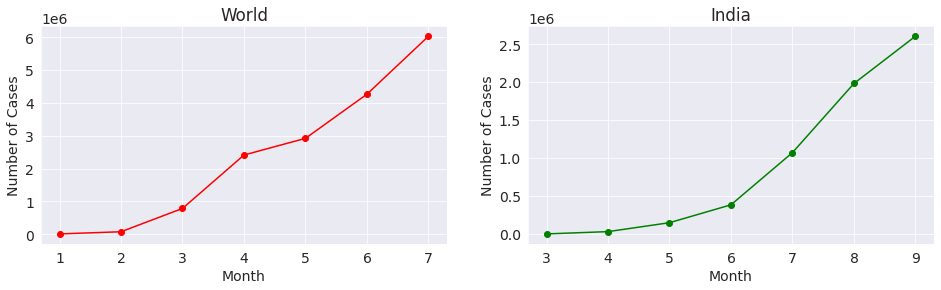

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].set_title('World')
axes[0].plot(month_df.index,month_df['New cases'],'o-r')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Cases')
axes[1].set_title('India')
axes[1].plot(india_month_df.index,india_month_df['New Cases'],'o-g')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Cases')

## Bar Plots for Number of Daily New Deaths

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


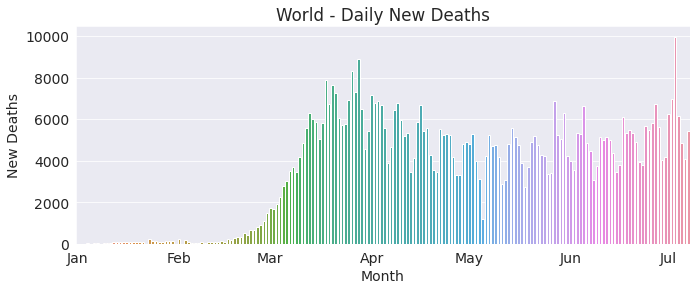

In [233]:
plt.figure(figsize = (11,4))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
sns.barplot(df.Date,df['New deaths'])
plt.xlabel('Month')
plt.ylabel('New Deaths')
plt.title('World - Daily New Deaths')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


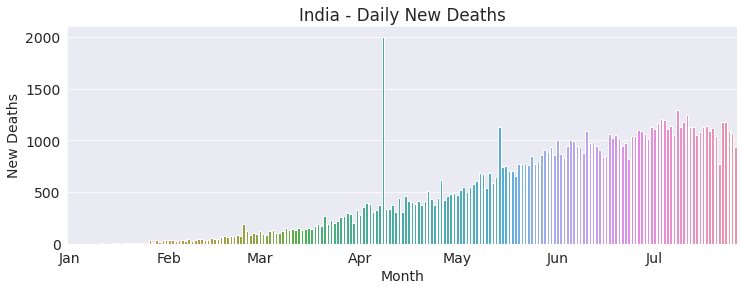

In [247]:
plt.figure(figsize = (12,4))
locator1 = mdates.MonthLocator()
fmt2 = mdates.DateFormatter('%b')
sns.barplot(india_df.Date,india_df['New Deaths'])
plt.xlabel('Month')
plt.ylabel('New Deaths')
plt.title('India - Daily New Deaths')
X = plt.gca().xaxis
X.set_major_locator(locator1)
X.set_major_formatter(fmt2)
plt.show()

## Plots for Cumulative Confirmed and Recovered Cases

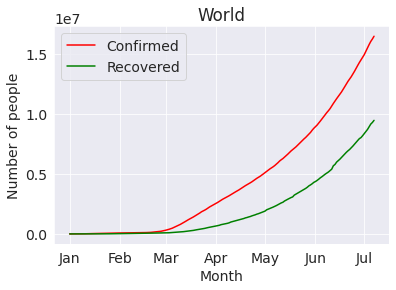

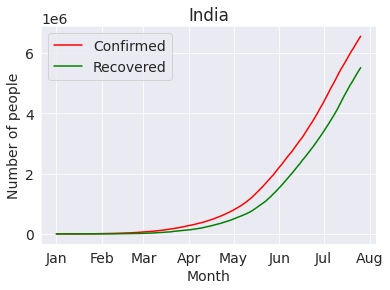

In [183]:
#world
plt.figure(figsize = (6,4))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plt.plot(df.Date,df['Confirmed'],'r')
plt.plot(df.Date,df['Recovered'],'g')
plt.ylabel('Number of people')
plt.xlabel('Month')
plt.legend(['Confirmed','Recovered'])
plt.title('World')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()
#India
plt.figure(figsize = (6,4))
locator1 = mdates.MonthLocator()
fmt1 = mdates.DateFormatter('%b')
plt.plot(india_df.Date,india_df['Confirmed Cases'],'r')
plt.plot(india_df.Date,india_df['Cured/Discharged'],'g')
plt.ylabel('Number of people')
plt.xlabel('Month')
plt.legend(['Confirmed','Recovered'])
plt.title('India')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

## Time Series plot for Daily New Cases and Daily New Recovered

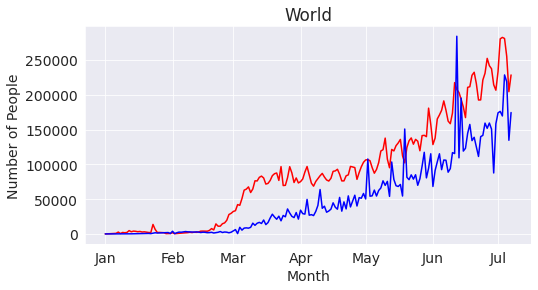

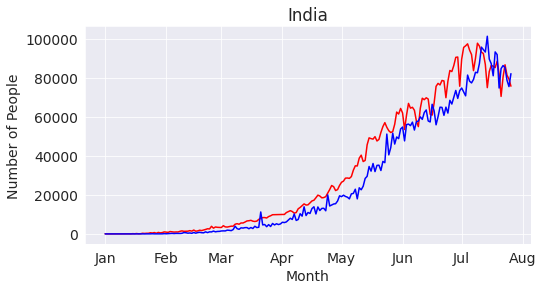

In [305]:
#world
plt.figure(figsize = (8,4))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plt.plot(df.Date,df['New cases'],'r')
plt.plot(df.Date,df['New recovered'],'b')
plt.ylabel('Number of People')
plt.xlabel('Month')
plt.title('World')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()
#india
plt.figure(figsize = (8,4))
locator1 = mdates.MonthLocator()
fmt1 = mdates.DateFormatter('%b')
plt.plot(india_df.Date,india_df['New Cases'],'r')
plt.plot(india_df.Date,india_df['New Recovered'],'b')
plt.ylabel('Number of People')
plt.xlabel('Month')
plt.title('India')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

Let us save and upload our work to Jovian before continuing

In [58]:
import jovian

In [309]:
jovian.commit(project='')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "saik65489/"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saik65489/zerotopandas-course-project-da3b5


'https://jovian.ml/saik65489/zerotopandas-course-project-da3b5'

## Asking and Answering Questions

This module involves getting insights from the data using numerical computations.



#### Q1: By which month of year 2020, the COVID-19 virus has affected almost all countries in the world ?

Ans: We have to plot the number of countries affected vs month for the world data set

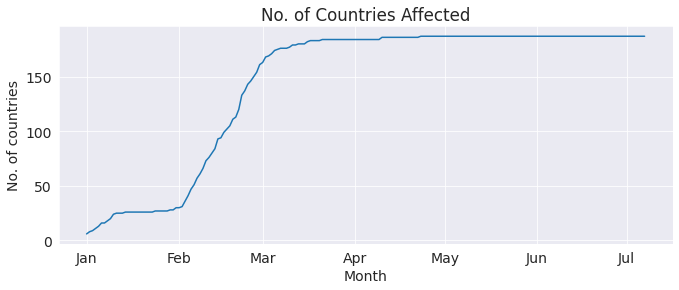

In [248]:
plt.figure(figsize = (11,4))
locator2 = mdates.MonthLocator()
fmt2 = mdates.DateFormatter('%b')
plt.plot(df.Date,df['No. of countries'])
plt.xlabel('Month')
plt.ylabel('No. of countries')
plt.title('No. of Countries Affected')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

From the above plot, we can conclude that by the beginning of March month a total of **187** countries are affected by COVID-19 virus.

#### Q2: On which days the highest number of new cases, new deaths, new recovered were recorded in world as of 27th July 2020?

In [254]:
df[df['New deaths']== df['New deaths'].max()]

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries,year,month,day,weekday
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,187,2020,7,23,3


In [255]:
df[df['New cases']== df['New cases'].max()]

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries,year,month,day,weekday
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,187,2020,7,23,3


In [256]:
df[df['New recovered']== df['New recovered'].max()]

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,No. of countries,year,month,day,weekday
162,2020-07-02,10875091,521341,5681477,4672273,207705,5120,284394,187,2020,7,2,3


Highest number of cases across world recorded on:  2020-07-23 

Highest number of deaths across world recorded on: 2020-07-23	

Highest number of deaths across world recorded on: 2020-07-02

#### Q3: On which days the highest number of new cases, new deaths, new recovered were recorded in India as of 30th September 2020 ?

In [257]:
india_df[india_df['New Deaths']== india_df['New Deaths'].max()]

,Date,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered,year,month,day,weekday
97,2020-06-17,354065,155227,186935.0,11903.0,10974,2003,6922,2020,6,17,2


In [258]:
india_df[india_df['New Cases']== india_df['New Cases'].max()]

,Date,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered,year,month,day,weekday
189,2020-09-17,5118253,1009976,4025079.0,83198.0,97894,1132,82719,2020,9,17,3


In [259]:
india_df[india_df['New Recovered']== india_df['New Recovered'].max()]

,Date,Confirmed Cases,Active Cases,Cured/Discharged,Death,New Cases,New Deaths,New Recovered,year,month,day,weekday
194,2020-09-22,5562663,975861,4497867.0,88935.0,75083,1053,101468,2020,9,22,1


Highest number of cases recorded in India on:  2020-09-17

Highest number of deaths recorded in India on: 2020-06-17	

Highest number of deaths recorded in India on: 2020-09-17	

#### Q4: Which month has the highest average daily new cases in world ?

In [263]:
avg_month_df[avg_month_df['New cases']==avg_month_df['New cases'].max()]

,New cases,New deaths,New recovered
month,,,
7,223367.074074,5289.851852,155060.296296


July has the highest average daily cases across the world.

#### Q5: Which month has the highest average daily cases in India ?

In [266]:
avg_month_df_india[avg_month_df_india['New Cases']==avg_month_df_india['New Cases'].max()]

,New Cases,New Deaths,New Recovered
month,,,
9,86817.266667,1100.933333,80434.133333


Sepetmber month has the average daily cases in India.

#### Q6: What is the value of Deaths per million population in world as of 27th July 2020 ?

In [275]:
total_population_world = 7794798739

In [270]:
total_deaths = df['New deaths'].sum()

In [276]:
world_deathratio = total_deaths*1000000/total_population_world
world_deathratio

83.90453966793561

World's deaths per million is close to **83**

#### Q6: What is the value of Deaths per million population in India as of 30th September 2020 ?

In [277]:
total_population_india = 1380004385

In [279]:
total_deaths_india = india_df['New Deaths'].sum()

In [281]:
india_deathratio = total_deaths_india*1000000/total_population_india
india_deathratio

73.75483810509776

India's deaths per million is close to **73**

It is less than world's deaths per million.

#### Q6: What is the fatality ratio of COVID-19 across the world ?

In [285]:
outcome = df['New cases'].sum()

In [290]:
world_fatality_percentage = (total_deaths/outcome)*100

In [291]:
world_fatality_percentage

3.9635228318947897

World's Fatality Ratio calculated as on 27th July 2020 from the dataset is close to **4%**

#### Q6: What is the fatality ratio of COVID-19 across India ?

In [292]:
outcome_india = india_df['New Cases'].sum()

In [293]:
india_fatality_percentage = (total_deaths_india/outcome_india)*100

In [294]:
india_fatality_percentage

1.5540724280018867

India's Fatality Ratio calculated as on 30th September 2020 from the dataset is close to **1.5%**

It is quite less than world's fatality ratio. There are many factors to be considered to know about the exact reason.

Let us save and upload our work to Jovian before continuing.

In [234]:
import jovian

In [310]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saik65489/zerotopandas-course-project-da3b5" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saik65489/zerotopandas-course-project-da3b5


'https://jovian.ml/saik65489/zerotopandas-course-project-da3b5'

## Inferences and Conclusion

From the plots and metrics we have used to analyse the data the following points are deduced:

1. India's population fatality ratio is very less i.e. a person getting infected by the virus has **1.5%** chance of dying compared to whole world population **4%**.

2. India saw unprecedented growth in the month of September where the average daily cases was very high.

3. World's average daily cases was very high during the month july.

4. Combining all the points of the analysis we can deduce the fact that the no. of cases are increasing exponentially. And the fatality of the disease is very low.




In [ ]:
import jovian

In [311]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saik65489/zerotopandas-course-project-da3b5" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saik65489/zerotopandas-course-project-da3b5


'https://jovian.ml/saik65489/zerotopandas-course-project-da3b5'

## References and Future Work
References:
Data Analysis with Python Course by Jovian.ml

Datasets from kaggle,prsindia.org

We can also consider the gender specific data of COVID-19. This gives us a clear idea of which gender is more prone to the virus. We can also add No. of Tests conducted for COVID-19 which gives us more information about the pandemic situation in the respective country.

In [ ]:
import jovian

In [313]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "saik65489/zerotopandas-course-project-da3b5" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/saik65489/zerotopandas-course-project-da3b5


'https://jovian.ml/saik65489/zerotopandas-course-project-da3b5'